Model MSE: 8246.09


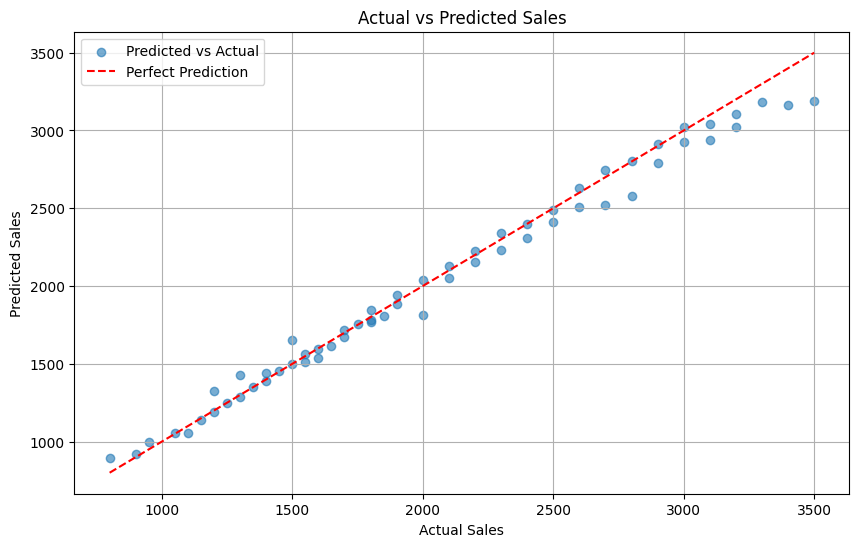


Sample of Actual vs Predicted Sales:
   Actual Sales  Predicted Sales
0          1500           1653.0
1          1200           1324.0
2           800            893.0
3          1800           1784.0
4          1600           1538.0
5           900            920.0
6          1700           1717.0
7          1400           1438.0
8           950            994.5
9          2000           1817.0

Sales Data Description:
       Actual Sales  Predicted Sales
count     60.000000        60.000000
mean    2045.833333      2016.983333
std      724.644370       674.051241
min      800.000000       893.000000
25%     1487.500000      1490.750000
50%     1900.000000      1866.500000
75%     2625.000000      2534.750000
max     3500.000000      3191.000000


In [8]:
import pandas as pd
import joblib
import os
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()

def evaluate_model(model, data: pd.DataFrame, encoder):
    """Evaluate the Random Forest model on the given data."""
    # Perform one-hot encoding using the loaded encoder
    data_encoded = encoder.transform(data.select_dtypes(include=['object']))

    # Combine encoded data with numerical features
    numeric_data = data.select_dtypes(exclude=['object'])
    data_encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out())
    data_final = pd.concat([numeric_data.reset_index(drop=True), data_encoded_df.reset_index(drop=True)], axis=1)

    # Separate features and target variable
    X = data_final.drop(['sales'], axis=1)  # Drop only the target variable
    y = data_final['sales']  # Target variable

    # Make predictions
    predictions = model.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, predictions)
    
    print(f'Model MSE: {mse:.2f}')

    # Plotting the predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y, predictions, alpha=0.6, label='Predicted vs Actual')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Perfect Prediction')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Actual vs Predicted Sales')
    plt.legend()
    plt.grid()
    plt.show()

    # Print a sample of the actual and predicted sales
    results_df = pd.DataFrame({'Actual Sales': y, 'Predicted Sales': predictions})
    
    # Display the first few rows of the results
    print("\nSample of Actual vs Predicted Sales:")
    print(results_df.head(10))  # Change the number to display more or fewer rows

    # Describe the results
    print("\nSales Data Description:")
    print(results_df.describe())

if __name__ == "__main__":
    # Get paths from environment variables
    feature_data_path = os.getenv('FEATURE_DATA_PATH')
    model_path = os.getenv('MODEL_PATH')
    encoder_path = os.getenv('ENCODER_PATH')

    # Load the feature data
    feature_data = pd.read_csv(feature_data_path)

    # Load the trained model and encoder
    model = joblib.load(model_path)  # Load the trained model
    encoder = joblib.load(encoder_path)  # Load the trained encoder

    # Evaluate the model
    evaluate_model(model, feature_data, encoder)


<div style="background-color: #FFCCCB; padding: 10px; border-radius: 5px;">

### Conceptual Overview
- **Actual vs Predicted Sales**: The displayed data shows the first ten instances of actual and predicted sales values. This comparison helps assess the model's accuracy.
- **Performance Metrics**: The mean squared error (MSE) quantifies the average squared difference between actual and predicted values, with lower values indicating better performance.
- **Statistical Summary**: The descriptive statistics provide insights into the distribution of sales data, highlighting central tendencies (mean, median) and variability (standard deviation).
- **Model Insights**: Understanding how closely the predicted sales align with actual values is crucial for making data-driven business decisions.
- **Next Steps**: Consider tuning hyperparameters or exploring different algorithms if the performance is not satisfactory.

</div>
